In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import re
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# 使用正则表达式搜索数字
def search_loc(s):
    match = re.search(r':c\.(\d+)', s)
    if match:
        number = match.group(1)
        return int(number)
    else:
        return None
    
df['loc_h'] = [search_loc(s) for s in  df['HGVSc_h']]

color_dict = dict({
    'gene':plt.cm.Purples(0.7), 
    'flank':plt.cm.Greens(0.7), 
    'nce4nce':plt.cm.Oranges(0.8), 
    'nce4pce': plt.cm.Oranges(0.6), 
    'pce4pce':plt.cm.Oranges(0.4),
    'coding':'#018175', #codig
    'noncoding':'#FEE3B2', #non-coding
    'SNP':"#D862BC", 
    'ONP':"#675a85",
    'INS':plt.cm.Greens(0.5),
    'DEL':plt.cm.Purples(0.7)
})
df_unique = df.drop_duplicates(subset = 'ID_human').reset_index(drop=True)

df_merge = pd.DataFrame({'loc':list(range(min(df_unique['loc_h']), max(df_unique['loc_h'])+1))})

df_draw_list = []
for x in [
    ['SNP','DNP','ONP'],
    ['INS'],
    ['DEL']
]:
    df_temp = df_unique[df_unique['type_h'].isin(x)].reset_index(drop=True)
    df_draw = pd.DataFrame(df_temp['loc_h'].value_counts()).reset_index(drop=False)
    df_draw = df_draw.rename(columns={'index':'loc',
                                      'loc_h':'count'})
    df_draw['s'] = 'h'
    df_draw = pd.merge(df_draw, df_merge, how = 'right', on = 'loc')
    df_draw['count'].fillna(0,inplace=True)
    df_draw['s'].fillna('h',inplace=True)
    df_draw = df_draw.sort_values(by = 'loc').reset_index(drop=True)
    df_draw_list.append(df_draw)
df_unique_mouse = df_unique[df_unique['status']==True].reset_index(drop=True)
df_unique_mouse['loc_m'] = [search_loc(s) for s in  df_unique_mouse['HGVSc_m']]
df_merge = pd.DataFrame({'loc':list(range(min(df_unique['loc_h']), max(df_unique['loc_h'])+1))})

df_draw_list_mouse = []
for x in [
    ['SNP','DNP','ONP','TNP'],
    ['INS'],
    ['DEL']
]:
    df_temp = df_unique_mouse[df_unique_mouse['type_m'].isin(x)].reset_index(drop=True)
    df_draw = pd.DataFrame(df_temp['loc_m'].value_counts()).reset_index(drop=False)
    df_draw = df_draw.rename(columns={'index':'loc',
                                      'loc_m':'count'})
    df_draw['s'] = 'm'
    df_draw = pd.merge(df_draw, df_merge, how = 'right', on = 'loc')
    df_draw['count'].fillna(0,inplace=True)
    df_draw['s'].fillna('m',inplace=True)
    df_draw = df_draw.sort_values(by = 'loc').reset_index(drop=True)
    df_draw_list_mouse.append(df_draw)

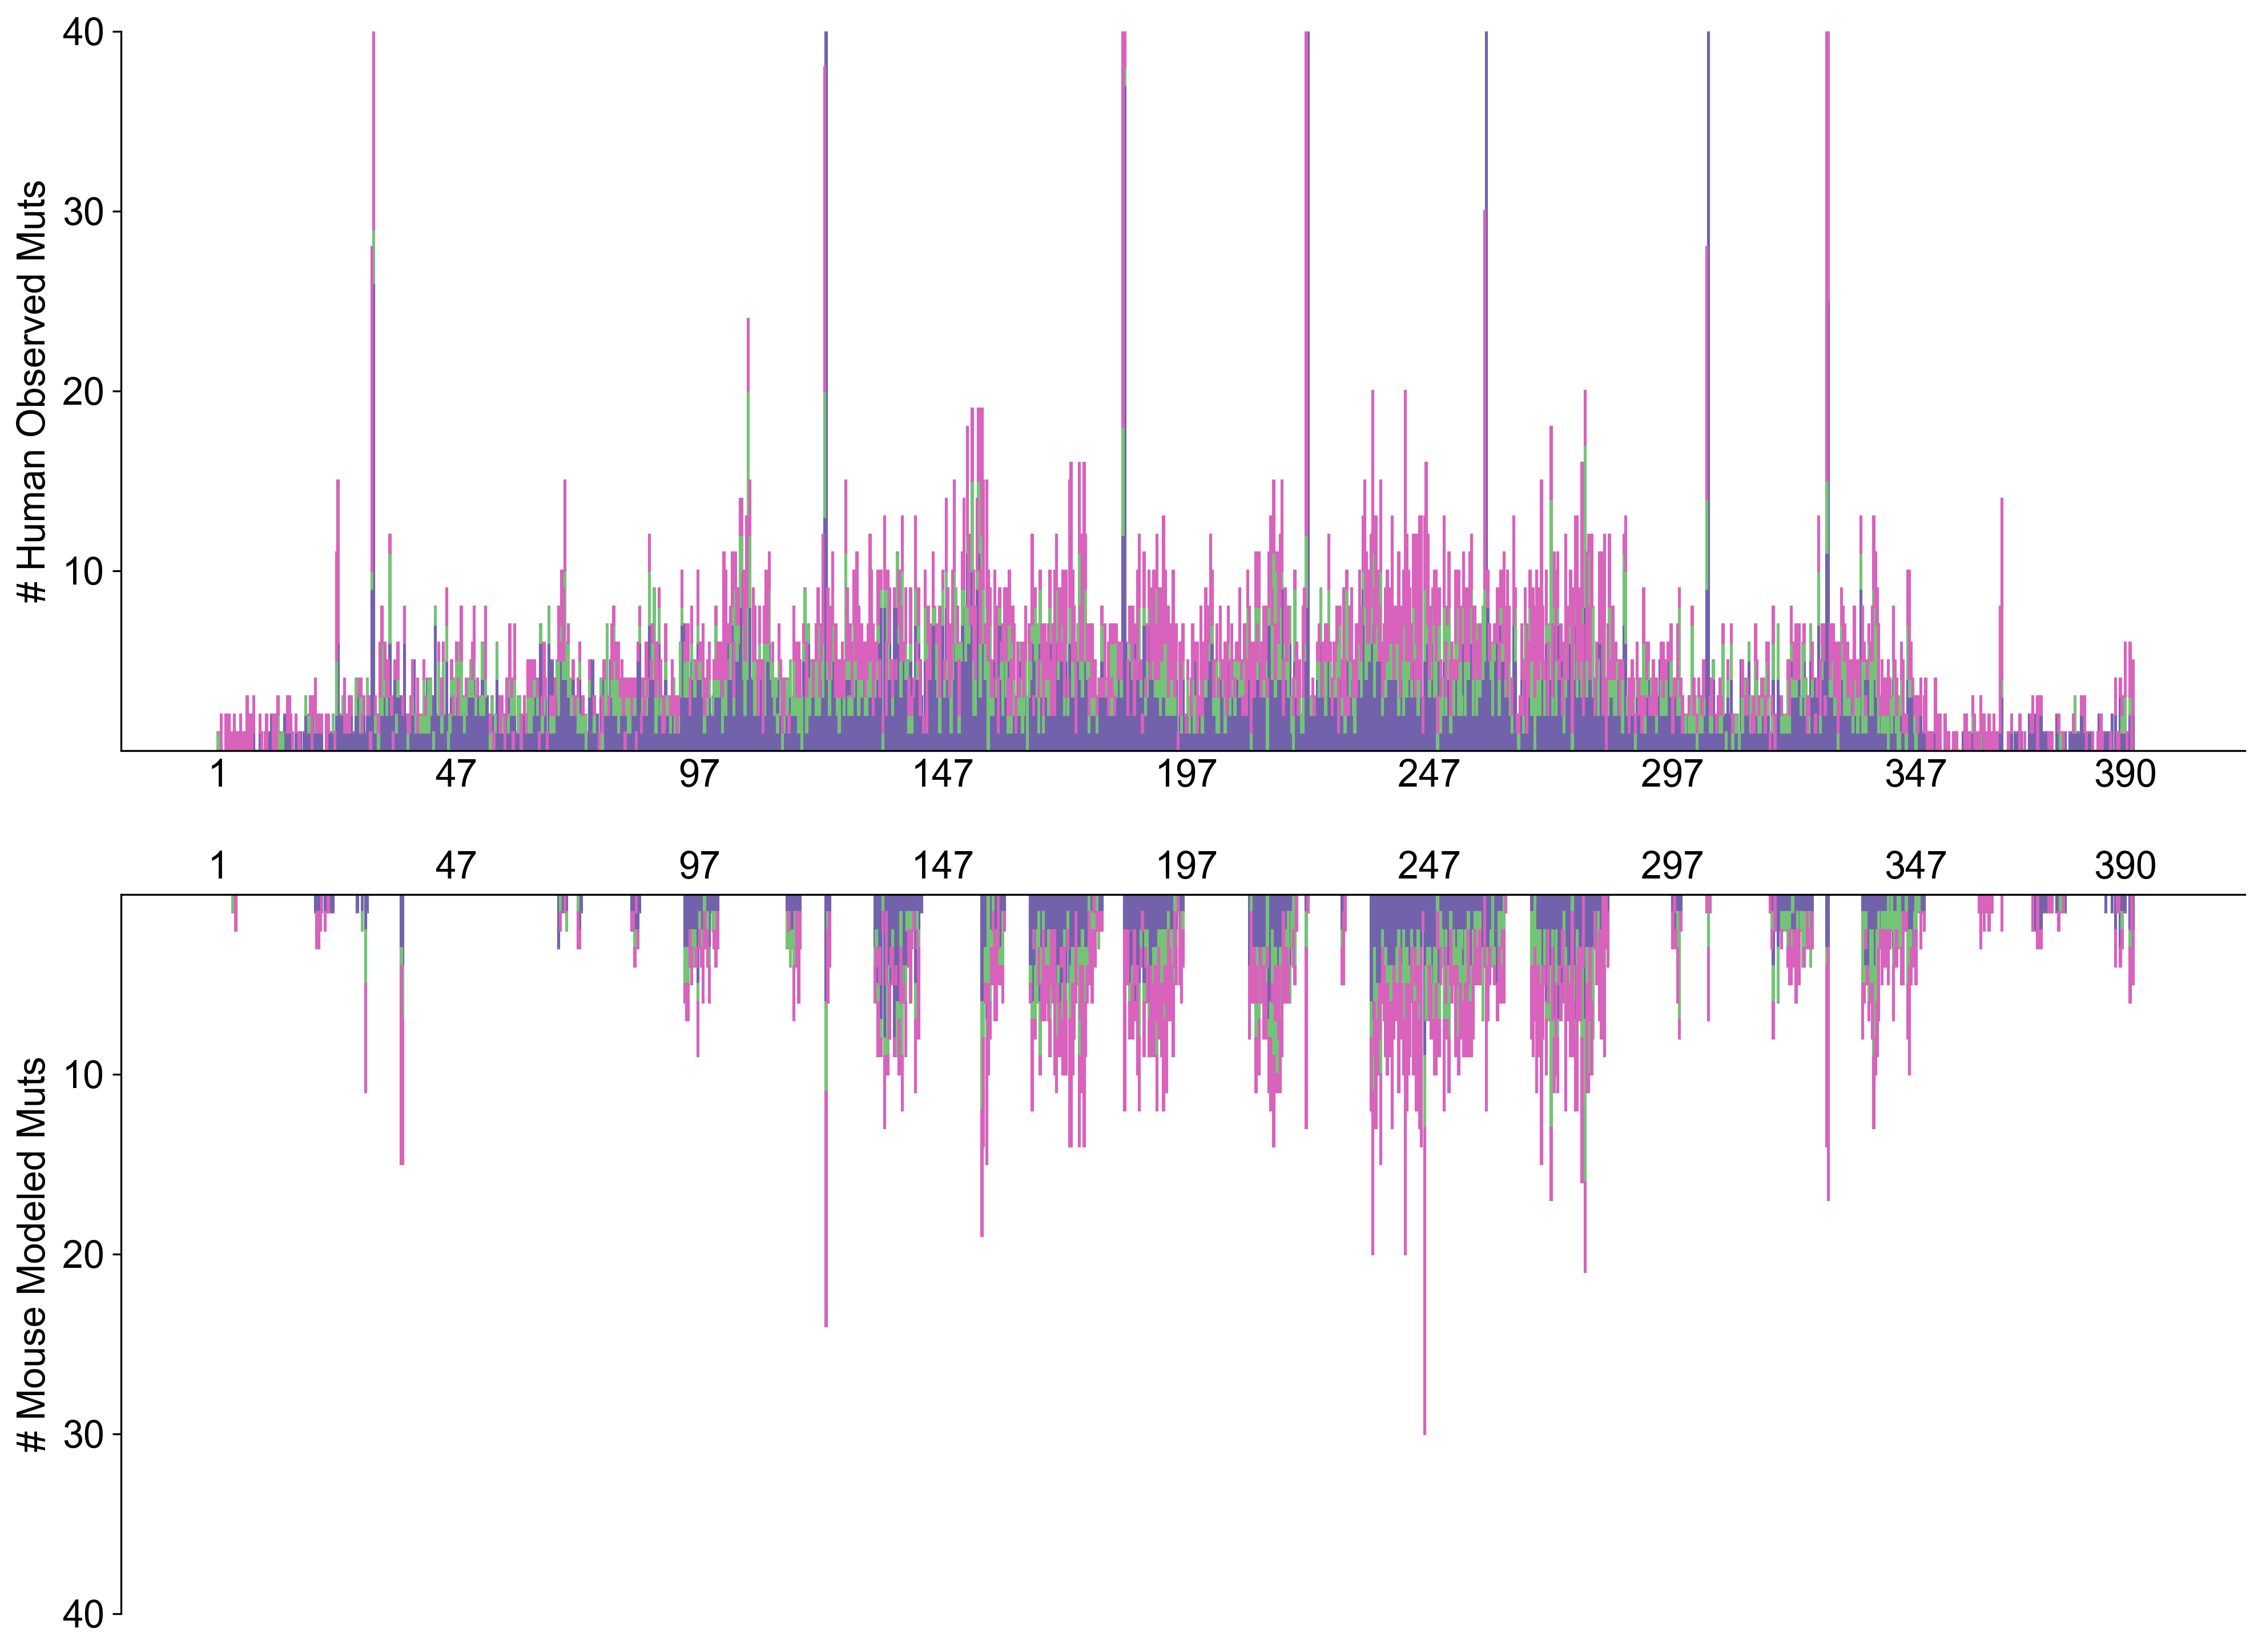

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(16,12), height_ratios=[1,1], sharex=True, dpi = 300)
ax[0].bar(df_draw_list[0]['loc'],df_draw_list[2]['count'], color=color_dict['DEL'], edgecolor=color_dict['DEL'], width = .5)
ax[0].bar(df_draw_list[1]['loc'],df_draw_list[1]['count'], color=color_dict['INS'], edgecolor=color_dict['INS'], bottom = df_draw_list[2]['count'], width = .5)
ax[0].bar(df_draw_list[2]['loc'],df_draw_list[0]['count'], color=color_dict['SNP'], edgecolor=color_dict['SNP'], bottom = [x+y for x,y in zip(df_draw_list[2]['count'], df_draw_list[1]['count'])], width = .5)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
# ax[0].tick_params(axis='both', which='major', labelsize=13)

ax[0].set_ylabel('# Human Observed Muts', fontsize=16)
ax[0].set_yticks([10,20,30,40])
ax[0].set_yticklabels([10,20,30,40], fontsize=16)
ax[0].set_ylim(0,40)
ax[0].set_xticks([x*3+1 for x in [0,49,99,149,199,249,299,349,392]])
ax[0].xaxis.set_tick_params(labelbottom=True, labeltop=False, length=0)
ax[0].set_xticklabels([1,50,100,150,200,250,300,350, 393], rotation=0, fontsize=16)

ax[1].bar(df_draw_list_mouse[0]['loc'],-df_draw_list_mouse[2]['count'], color=color_dict['DEL'], edgecolor=color_dict['DEL'], width = .5)
ax[1].bar(df_draw_list_mouse[1]['loc'],-df_draw_list_mouse[1]['count'], color=color_dict['INS'], edgecolor=color_dict['INS'], bottom = -df_draw_list_mouse[2]['count'], width = .5)
ax[1].bar(df_draw_list_mouse[2]['loc'],-df_draw_list_mouse[0]['count'], color=color_dict['SNP'], edgecolor=color_dict['SNP'], bottom = [-(x+y) for x,y in zip(df_draw_list_mouse[1]['count'], df_draw_list_mouse[2]['count'])], width = .5)
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)

ax[1].set_ylabel('# Mouse Modeled Muts', fontsize=16)
ax[1].set_yticks([-10,-20,-30,-40])
ax[1].set_yticklabels([10,20,30,40], fontsize=16)
ax[1].set_ylim(-40,0)
ax[1].xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax[1].set_xticks([x*3+1 for x in [0,49,99,149,199,249,299,349,392]])
ax[1].set_xticklabels([1,47,97,147,197,247,297,347, 390], rotation=0, fontsize=16)

plt.savefig('/Users/gorkordkx/Documents/Output/h2m/tp53_v3.svg', bbox_inches='tight')
plt.show()